In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [ ]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


 EDA

In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [ ]:
df.shape

(1436, 11)

In [ ]:
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [ ]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
print("Columns in the dataset:", df.columns)


Columns in the dataset: Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


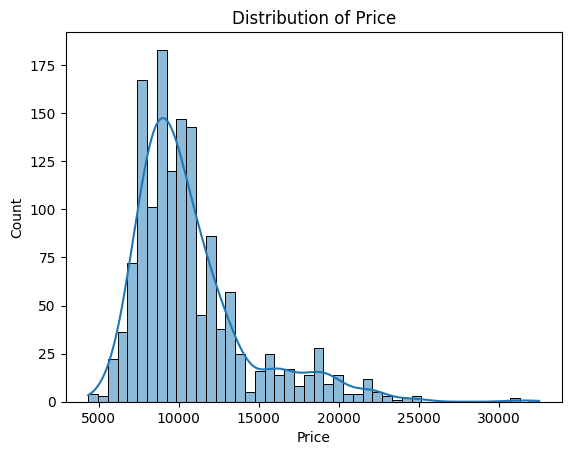

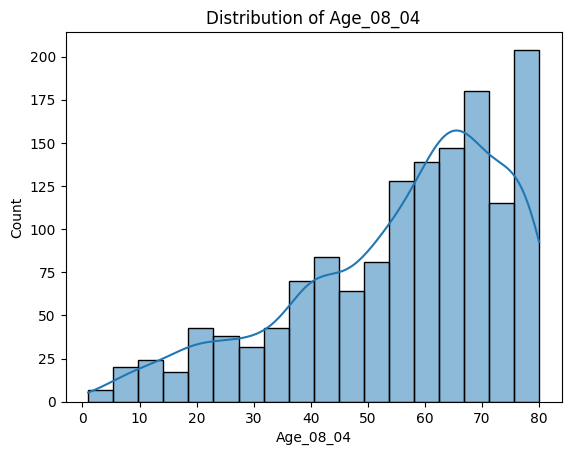

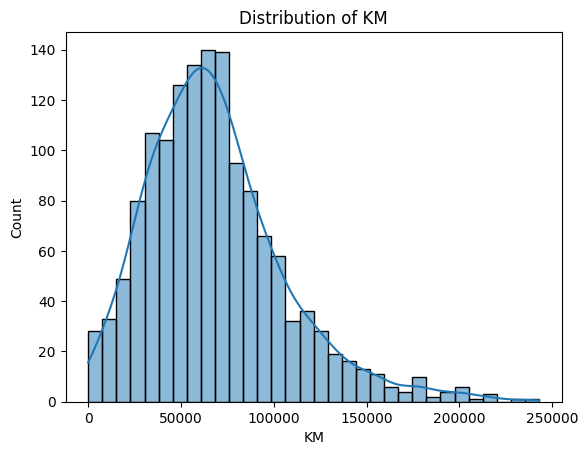

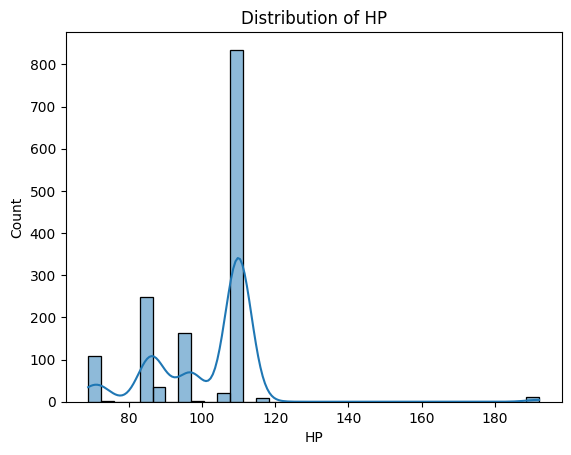

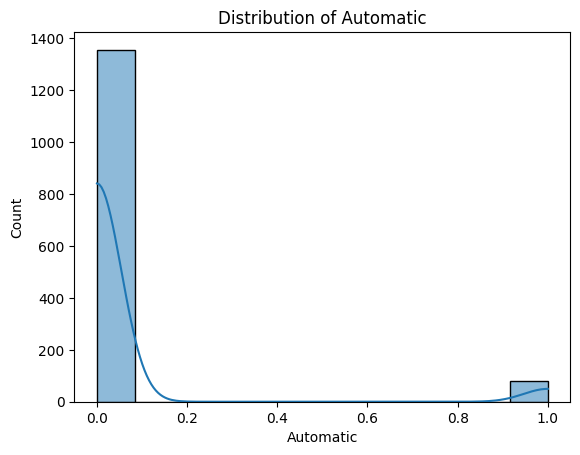

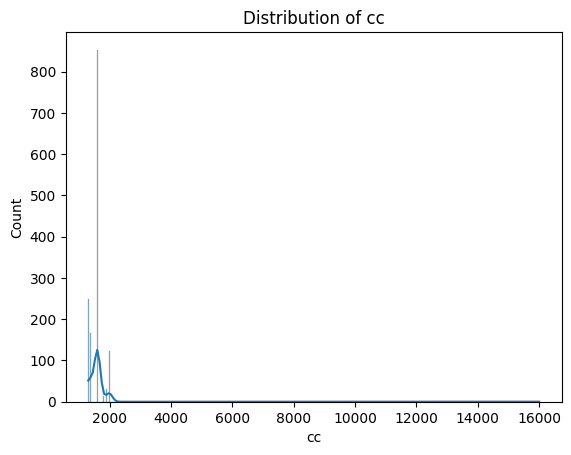

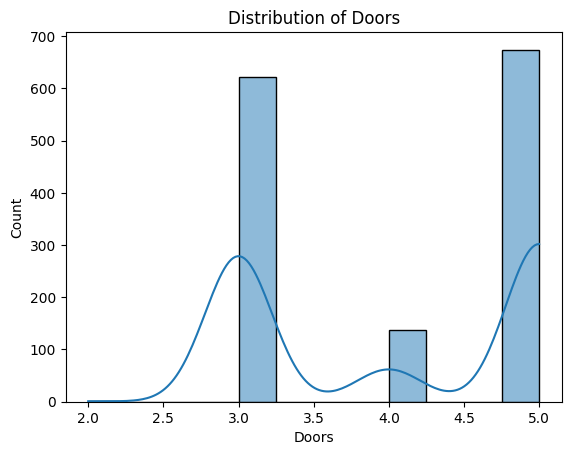

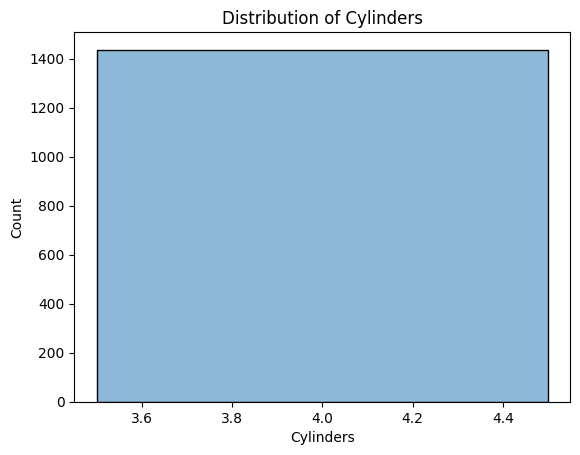

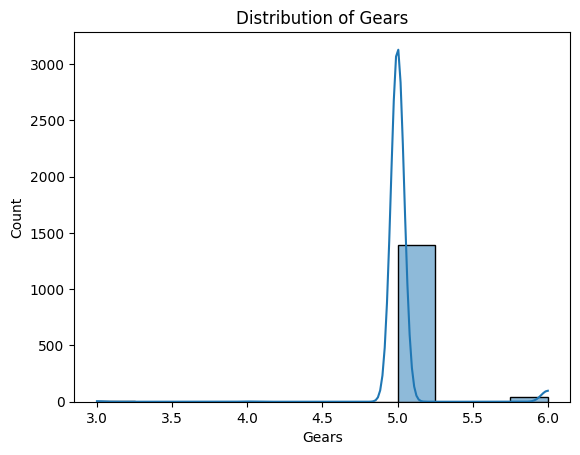

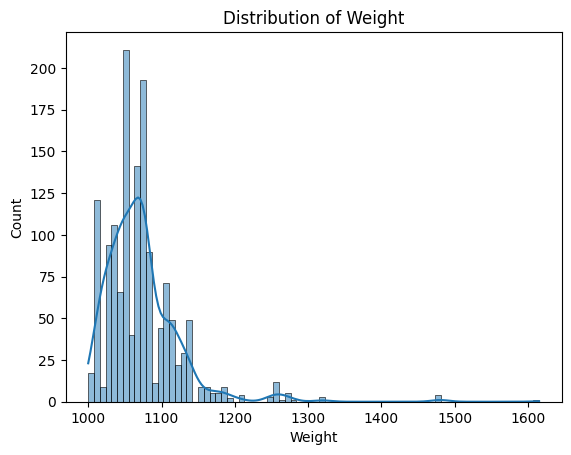

In [ ]:
# Visualize distributions of numerical variables
numeric_features = ['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight']
for feature in numeric_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

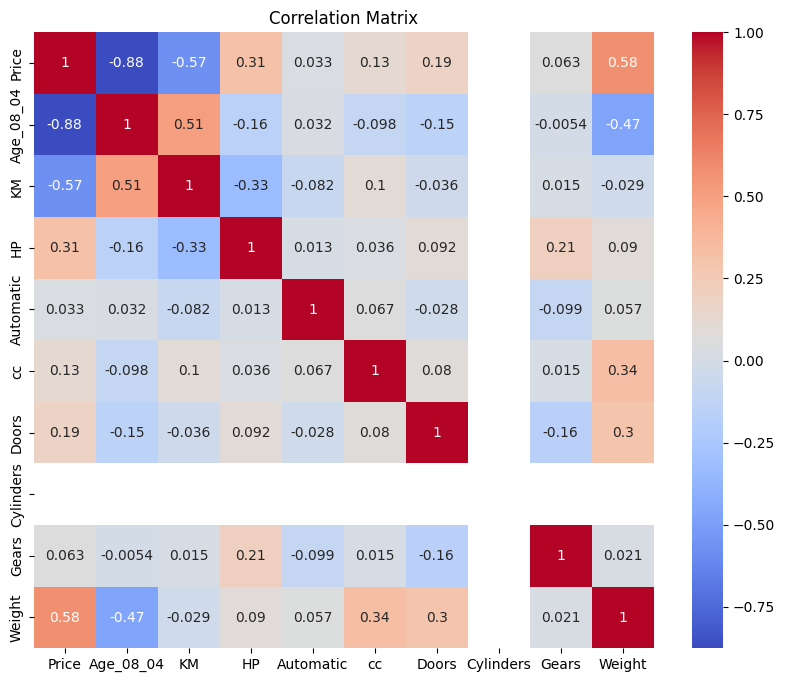

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


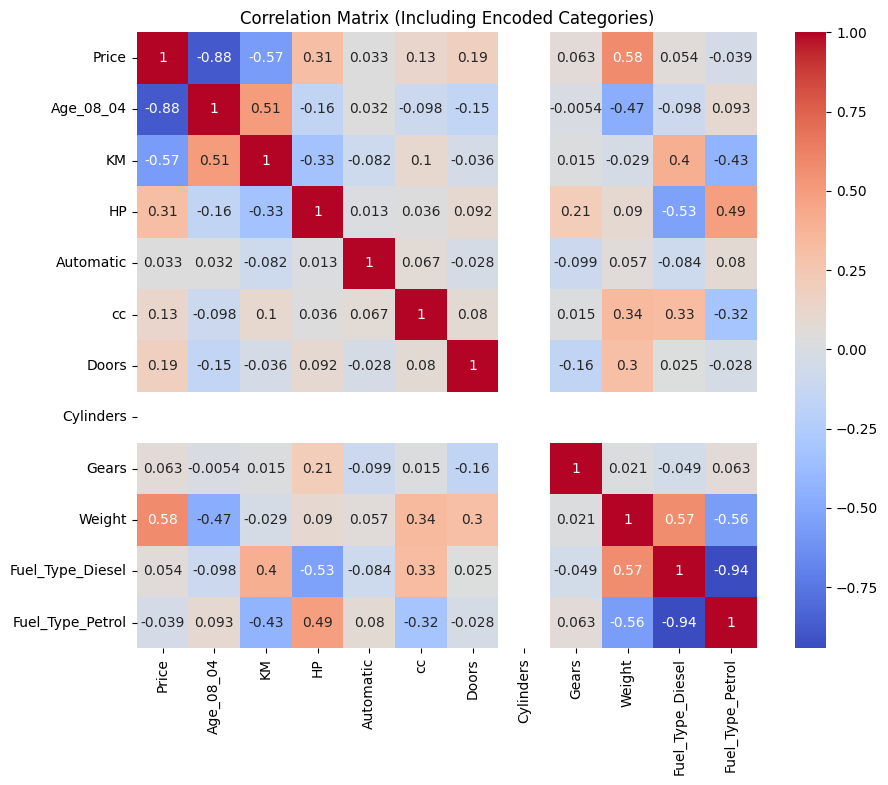

In [ ]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate correlation matrix for the entire dataset
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Including Encoded Categories)")
plt.show()


Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


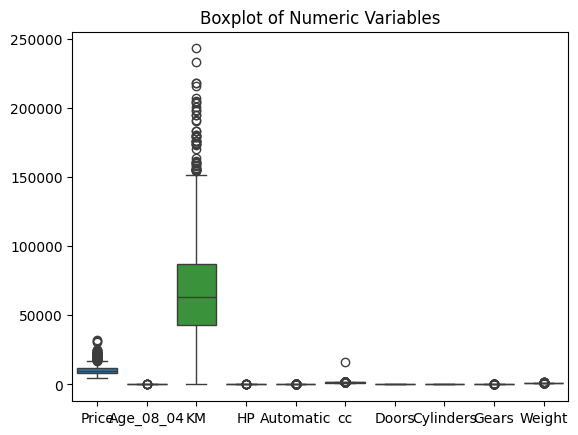

In [ ]:
print(df.columns)# Boxplots to identify outliers
sns.boxplot(data=df[numeric_features])
plt.title("Boxplot of Numeric Variables")
plt.show()


Data Preprocessing

In [ ]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Check the new columns
print("Updated columns:", df.columns)


Updated columns: Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')


In [ ]:
print("Columns in the DataFrame:", df.columns)


Columns in the DataFrame: Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Define the target (y) and features (X)
X = df.drop(columns=['Price'])
y = df['Price']

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build Multiple Linear Regression Models

In [ ]:
# Initialize the Linear Regression model
lr = LinearRegression()

In [ ]:
# Train the model
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on test data
y_pred = lr.predict(X_test)

In [ ]:
# Print coefficients
print("Model 1 Coefficients:", lr.coef_)


Model 1 Coefficients: [-2.26729478e+03 -6.11654412e+02  2.08349858e+02  3.43971298e+01
 -1.41619166e+01 -5.74678039e+01  7.81597009e-14  1.09340417e+02
  1.31681831e+03 -2.17221726e+01  4.58047731e+02]


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Linear Regression Model - MSE: {mse:.2f}, R^2: {r2:.2f}")

Linear Regression Model - MSE: 2203043.82, R^2: 0.83


In [ ]:
# Display model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
print(coefficients)

             Feature   Coefficient
0          Age_08_04 -2.267295e+03
1                 KM -6.116544e+02
2                 HP  2.083499e+02
3          Automatic  3.439713e+01
4                 cc -1.416192e+01
5              Doors -5.746780e+01
6          Cylinders  7.815970e-14
7              Gears  1.093404e+02
8             Weight  1.316818e+03
9   Fuel_Type_Diesel -2.172217e+01
10  Fuel_Type_Petrol  4.580477e+02


Evaluate the Model Performance

In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, lasso_pred)
r2_lasso = r2_score(y_test, lasso_pred)

In [ ]:
print(f"Lasso Regression - MSE: {mse_lasso:.2f}, R^2: {r2_lasso:.2f}")

Lasso Regression - MSE: 2199988.10, R^2: 0.84


In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

In [ ]:
print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R^2: {r2_ridge:.2f}")

Ridge Regression - MSE: 2200942.87, R^2: 0.84


#Interview Questions:

###1.What is Normalization & Standardization and how is it helpful?
Answer:

##Normalization:

Normalization scales the data to a range, typically [0, 1].
Use Case: It is helpful when the data does not follow a Gaussian distribution or when machine learning algorithms like k-Nearest Neighbors (k-NN) or Neural Networks are sensitive to the scale of data.

Benefit: Ensures that all features contribute equally to the model, preventing larger values from dominating smaller ones.

##Standardization:

Standardization scales the data to have a mean of 0 and a standard deviation of 1.

Use Case: Useful when features have different units or when algorithms like SVM or PCA assume normally distributed data.

Benefit: Preserves the relative relationships between features while bringing them to the same scale.

Key Difference:

Normalization rescales data to a fixed range, while standardization centers data around the mean and standard deviation.

The choice depends on the model and the nature of the data.

###2.What techniques can be used to address multicollinearity in multiple linear regression?
Answer:

Multicollinearity occurs when independent variables are highly correlated, which can make regression coefficients unstable and reduce model interpretability. Here are techniques to address it:

**Remove Highly Correlated Predictors: **Use a correlation matrix or Variance Inflation Factor (VIF) to identify highly correlated variables.

Drop one of the correlated variables to reduce redundancy.

**Principal Component Analysis (PCA):** Reduce dimensionality by transforming the correlated variables into uncorrelated principal components.

Use the principal components as predictors in the regression model.

**Regularization Methods:** Use techniques like Ridge Regression (L2 regularization) or Lasso Regression (L1 regularization) to shrink coefficients and reduce the impact of multicollinearity.

Lasso can also perform feature selection by shrinking some coefficients to zero.

**Combine Variables:** Create composite variables by combining correlated predictors into a single feature (e.g., averaging them).

**Increase Sample Size:** Collect more data to stabilize coefficient estimates, although this may not always be feasible.

**Use Partial Least Squares (PLS):** PLS combines features to create uncorrelated components while maintaining the predictive power of the model.

Addressing multicollinearity improves the stability and interpretability of regression models, ensuring that variable coefficients are more reliable.

